<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/Taller9_KarenPira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso 1 :

Contexto:

HINA Inc. es una gran empresa de productos de gran consumo que está racionalizando su
presupuesto de marketing. Esto, a su vez, significa reevaluar la eficacia de su gasto actual en
diversos canales de marketing. Como analista, debe averiguar si el gasto en campañas
publicitarias en televisión se traduce en un aumento directo de las ventas.

En otras palabras,
tiene que averiguar si el gasto en publicidad televisiva y las cifras de ventas comparten una
misma relación.


Recuerde que disponemos de datos publicitarios históricos (ventas semanales y gasto en
cada canal) de casi los cuatro años anteriores en el archivo advertising.csv.


In [ ]:
#Cargamos el archivo desde link
#"advertising.csv"

url = "https://drive.google.com/file/d/1O7dfvADngW69l_PD1JxzfimiDEjoxA4y/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

advertising = pd.read_csv(path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


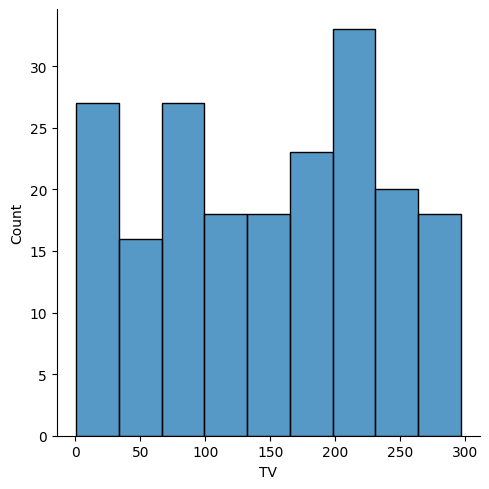

In [ ]:
sns.displot(data=advertising, x='TV')

<Axes: xlabel='TV', ylabel='Sales'>

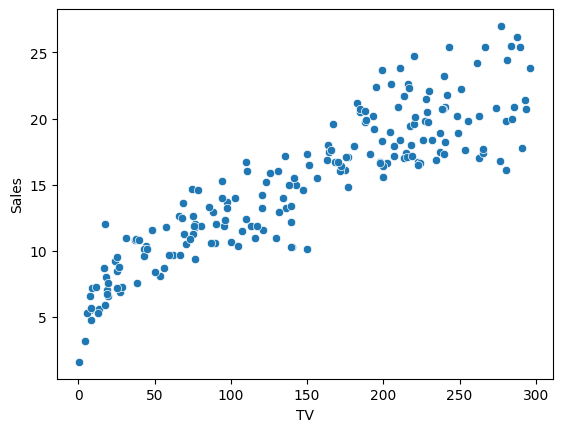

In [ ]:
sns.scatterplot(data=advertising, x='TV', y='Sales')

Se observa que los datos tienen un comportamiento creciente casi constante por lo que se ve factible hacer una regresión lineal

In [ ]:
advertising[['TV','Sales']].describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


<Axes: >

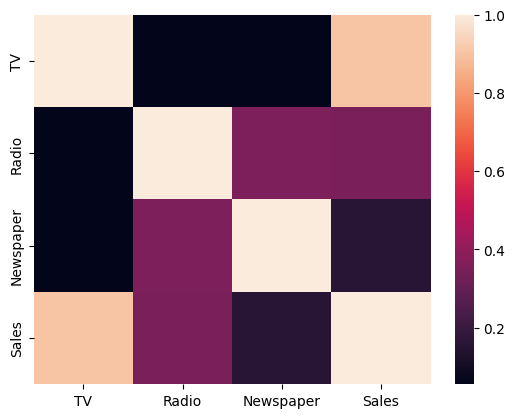

In [ ]:
sns.heatmap(advertising.corr())

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X =advertising[['TV']]

y = advertising[['Sales']]

In [ ]:
#Crear datasets de train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40)

In [ ]:
#Instanciamos el modelo
reg = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#se hace la predicción
y_pred = reg.predict(X_test)

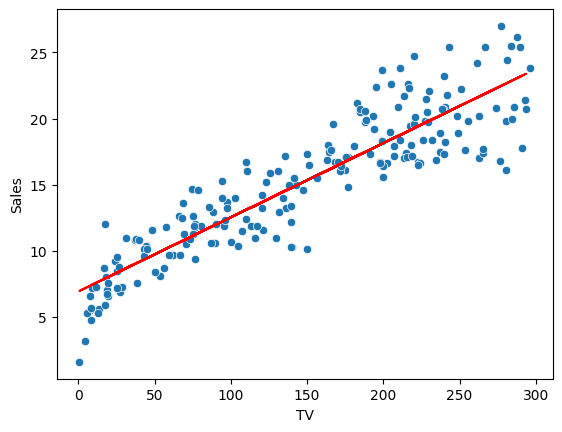

In [ ]:
#graficamos la función de regresión lineal
sns.scatterplot(data=advertising, x='TV', y='Sales')

plt.plot(X_test.values, y_pred, color='red')

plt.show()

In [ ]:
reg.coef_

array([[0.05606083]])

In [ ]:
reg.intercept_

array([6.92671694])

Entonces la ecuación de nuestro modelo es:

$y = 0.056x + 6.926$

In [ ]:
mean_squared_error(y_test,y_pred)

5.19180707459125

In [ ]:
r2_score(y_test,y_pred)

0.8117962369669398

Con la información anterior se puede decir que la relación entre anuncios por TV es positiva frente a las ventas en un 0.056 y sino se emitiera anuncios por este medio aun asi podrian obtenerce alrederor de 7 ventas, en resumen se necesita emitir cerca de 18 anuncios por TV para conseguir una venta adicional, esta interpretación tiene una coeficiente de determinación del 80%. Hay que determinar si se llega al punto de equilibrio con este ratio.

#Caso 2 :

Consideremos el conjunto de datos Shill_Bidding_Dataset.csv, que contiene detalles sobrelas subastas de varios productos en eBay.com. La columna de destino, Class, proporciona información sobre el comportamiento de puja, siendo 0 normal y 1 comportamiento anormal.

El comportamiento anormal puede ser similar a clics maliciosos o pujas automáticas. Se le ha pedido que desarrolle un modelo de aprendizaje automático que pueda predecir si elcomportamiento de puja en una subasta concreta es normal (0) o no (1). Aplique tanto la regresión lineal como la logística para predecir el resultado y compruebe cuál de ellas es útil
en esta situación.

In [ ]:
#Cargamos el archivo desde link
#Shill_Bidding_Dataset.csv"
##
url2 = "https://drive.google.com/file/d/1l8yEPIhWxin1vvHHWOfUwquleMM4EUtn/view?usp=sharing"
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(path2)
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
data['Bidder_ID']

0       _***i
1       g***r
2       t***p
3       7***n
4       z***z
        ...  
6316    l***t
6317    s***s
6318    h***t
6319    d***d
6320    a***l
Name: Bidder_ID, Length: 6321, dtype: object

In [ ]:
data.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [ ]:
data.corr()

<ipython-input-25-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.011075,-0.040123,0.005271,0.037588,0.048377,0.001265,0.031719,-0.057151,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.006902,-0.021424,-0.003175,0.070341,0.097558,0.016182,0.068427,-0.039779,0.024918,-0.007985
Bidder_Tendency,0.011075,-0.006902,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,-0.040123,-0.021424,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.005271,-0.003175,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035
Last_Bidding,0.037588,0.070341,0.044999,-0.066541,0.098941,1.000000,0.297639,0.293323,0.950096,-0.076726,0.011454,0.097655
Auction_Bids,0.048377,0.097558,0.086564,-0.347831,0.065361,0.297639,1.000000,0.629086,0.298878,-0.381442,0.093331,0.044964
Starting_Price_Average,0.001265,0.016182,0.073242,-0.252289,0.052263,0.293323,0.629086,1.000000,0.302958,-0.262655,0.022990,0.042604
Early_Bidding,0.031719,0.068427,0.019978,-0.147773,0.056798,0.950096,0.298878,0.302958,1.000000,-0.137005,0.011296,0.053570
Winning_Ratio,-0.057151,-0.039779,0.212170,0.642905,0.382002,-0.076726,-0.381442,-0.262655,-0.137005,1.000000,-0.023965,0.394122


<ipython-input-26-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

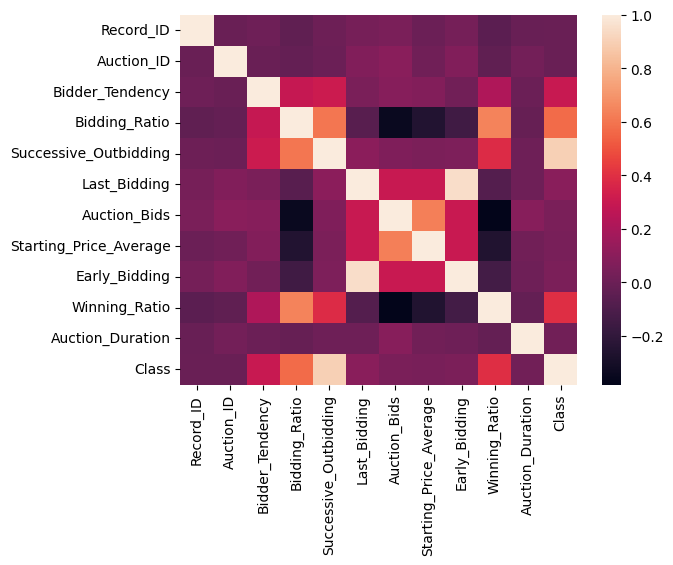

In [ ]:
sns.heatmap(data.corr())

In [ ]:
df = data.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID'])

In [ ]:
df.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


Preprara los datos

In [ ]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
# usar las columnas que tienen mayor correlación con la clase serían Bidding_Ratio Successive_Outbidding Winning_Ratiolas tres son tipo float

X1= df[['Bidding_Ratio', 'Successive_Outbidding', 'Winning_Ratio']]

y1= df[['Class']]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state=1264)

Modelo de regresion


In [ ]:
reg1 = linear_model.LinearRegression()

In [ ]:
reg1.fit(X_train1,y_train1)

LinearRegression()

In [ ]:
## Hacemos la predicción
y_pred1 = reg1.predict(X_test1)

In [ ]:
reg1.coef_

array([[-0.01217067,  0.97061076,  0.04093982]])

In [ ]:
reg1.intercept_

array([-0.0081164])

In [ ]:
mean_squared_error(y_test1,y_pred1)

0.01766795370068176

In [ ]:
print('RMSE:', np.sqrt(mean_squared_error(y_test1,y_pred1)))

RMSE: 0.1329208550253938


In [ ]:
r2_score(y_test1,y_pred1)

0.822290920131224

Modelo de clasificación

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
#Entrenamos el modelo
model.fit(X_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#evaluamos el modelo
y_pred2 = model.predict(X_test1)

In [ ]:
#Evaluar el modelo
model.score(X1,y1)

0.9742129409903496

In [ ]:
accuracy_score(y_test1,y_pred2)

0.9797596457938014

In [ ]:
confusion_matrix(y_test1,y_pred2)

array([[1389,   15],
       [  17,  160]])

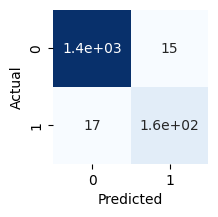

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(2, 2))

# Graficar el heatmap de la matriz de confusión
sns.heatmap(confusion_matrix(y_test1,y_pred2),
            annot=True, #Para mostrar valores
            cbar=False, #Ocultamos la leyenda de los colores
            cmap="Blues")

# Configurar etiquetas de los ejes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Mostrar el gráfico
plt.show()

In [ ]:
classification_report(y_test1,y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1404\n           1       0.91      0.90      0.91       177\n\n    accuracy                           0.98      1581\n   macro avg       0.95      0.95      0.95      1581\nweighted avg       0.98      0.98      0.98      1581\n'

In [ ]:
from tabulate import tabulate

report = classification_report(y_test1, y_pred2)


report_data = []
lines = report.split('\n')
for line in lines[2:-3]:
    row = line.split()
    report_data.append(row)

table = tabulate(report_data, headers=['', 'precision', 'recall', 'f1-score', 'support'], tablefmt='fancy_grid')
print(table)


╒══════════╤═════════════╤══════════╤════════════╤═══════════╕
│          │   precision │   recall │   f1-score │   support │
╞══════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0        │        0.99 │     0.99 │       0.99 │      1404 │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1        │        0.91 │     0.9  │       0.91 │       177 │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│          │             │          │            │           │
├──────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy │        0.98 │  1581    │            │           │
╘══════════╧═════════════╧══════════╧════════════╧═══════════╛


En relación con los resultados, la evaluación del modelo de regresión lineal dio una calificación de 82 % en cambio el modelo de regresión logistica dio un porcentaje del 98% de precisión. Ya que el objetivo esta entre 0 y 1, puede aplicarse un modelo de clasificación pero el resultado tan alto de precisión puede poner en duda el modelo